In [1]:
# Import frameworks
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Create a data frame from the csv file
data = pd.read_csv('model_ready_data.csv')

# Split the data into training and testing data
training_data, testing_data = train_test_split(data, test_size=0.4, shuffle=True)

# Save the training and testing data to csv files
training_data.to_csv('training_data.csv', index=False)
testing_data.to_csv('testing_data.csv', index=False)

In [3]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [4]:
# Create a data frame from the csv file
training_data = pd.read_csv('training_data.csv')

x_name = 'Risk%'
y_name = 'AHI'
x = np.array(training_data[x_name]).reshape(-1, 1)
y = np.array(training_data[y_name])

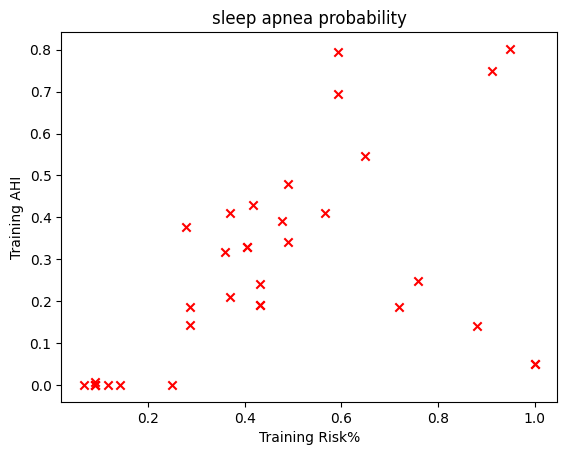

In [5]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("sleep apnea probability")
# Set the y-axis label
plt.ylabel(f'Training {training_data[y_name].name}')
# Set the x-axis label
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

In [6]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

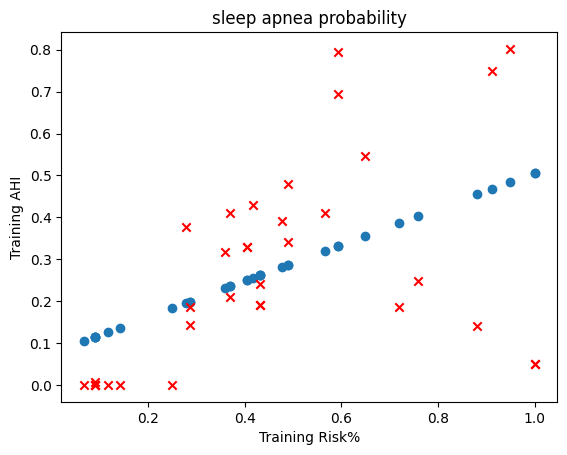

In [7]:
y_pred = my_model.predict(x)
plt.scatter(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.title("sleep apnea probability")
plt.ylabel(f'Training {training_data[y_name].name}')
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

In [8]:
# save the model to disk
filename = 'apnea_model_v1.sav'
pickle.dump(my_model, open(filename, 'wb'))